<a href="https://colab.research.google.com/github/rifat19331279/DNAsequenceQuantumSearch/blob/main/Trail_swap_test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install qiskit

In [ ]:
pip install pylatexenc

[0.37796447 0.9258201 ]
[0.61237244 0.79056942]


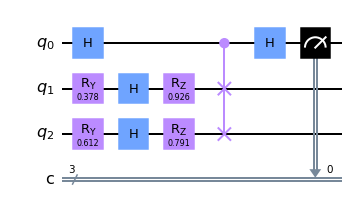

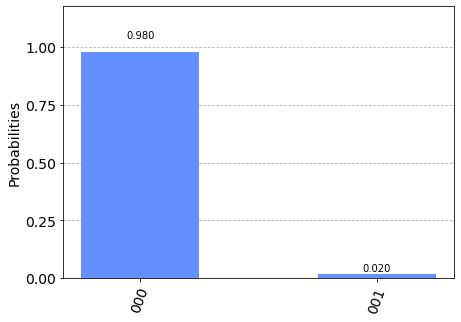

In [ ]:
# Import qiskit and call it q for short so we can construct,simulate, and run quantum circuits!
import qiskit as q
# Import Numpy and call it np so we can do maths!
import numpy as np

# Import the python plotting module of matplotlib and call it plt so we can draw graphs!
import matplotlib.pyplot as plt
# Tell matplotlib that we are in an Ipython notebook
%matplotlib inline

Q0=np.array([1,0])                    # |0>
state1=np.array((1,6))                # first state vector to compare
state2=np.array((3,5))                # second state vector to compare

state1=np.sqrt(state1/np.sum(state1))
state2=np.sqrt(state2/np.sum(state2))

print(state1)
print(state2)



qreg_q = q.QuantumRegister(3, 'q')
creg_c = q.ClassicalRegister(3, 'c')
circuit = q.QuantumCircuit(qreg_q, creg_c)

#circuit.initialize(qstate,qreg_q)
circuit.ry(state1[0],qreg_q[1])
circuit.h(qreg_q[1])
circuit.rz(state1[1],qreg_q[1])


circuit.ry(state2[0],qreg_q[2])
circuit.h(qreg_q[2])
circuit.rz(state2[1],qreg_q[2])

circuit.h(qreg_q[0])
circuit.cswap(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.h(qreg_q[0])

circuit.measure(qreg_q[0], creg_c[0])

display(circuit.draw(output="mpl"))


# Drawing the histogram

backend = q.Aer.get_backend('qasm_simulator')
job = q.execute(circuit, backend, shots=100)
result = job.result()
counts = result.get_counts(circuit)


graph = q.visualization.plot_histogram(counts)



display(graph)